In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("carprediction.csv")

In [3]:
df.shape

(11914, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [9]:
df.dropna(subset=['Engine Fuel Type','Engine HP','Engine Cylinders','Number of Doors','Vehicle Size','Vehicle Style'],inplace=True)

<Figure size 2000x2000 with 0 Axes>

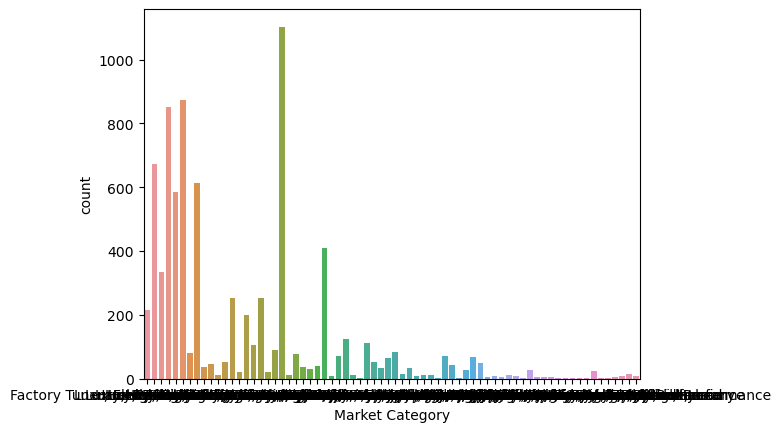

<Figure size 2000x2000 with 0 Axes>

In [10]:
sns.countplot(x="Market Category",data=df)
plt.figure(figsize=(20,20))


In [11]:
df["Market Category"].value_counts()

Crossover                                          1103
Flex Fuel                                           872
Luxury                                              851
Luxury,Performance                                  673
Hatchback                                           614
                                                   ... 
Crossover,Exotic,Luxury,High-Performance              1
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: Market Category, Length: 70, dtype: int64

In [12]:
df["Market Category"].ffill(inplace=True)

In [13]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

/var/folders/xr/3mqjmrq562xfx5pt_g5skdl40000gn/T/ipykernel_1220/3741435611.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = df.corr()


<Axes: >

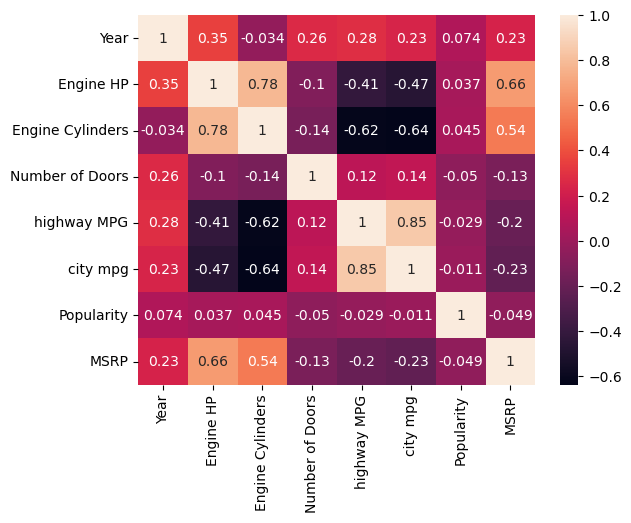

In [14]:
cor_mat = df.corr()
sns.heatmap(cor_mat,annot=True)

In [15]:
y=df["MSRP"]
columns_to_scale = df.select_dtypes(exclude=['object']).columns
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [16]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
    

In [19]:
X = df.drop('MSRP',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)


DecisionTreeRegressor()

In [27]:
y_pred=model.predict(X_test)


In [34]:
r2_score(y_test,y_pred)

0.9823949162477249

In [40]:
train_score, test_score = list(),list()
for i in range (1,21):
      model = DecisionTreeRegressor(max_depth= i)
      model.fit(X_train,y_train)
      y_pred_train = model.predict(X_train)
      train_acc = r2_score(y_train,y_pred_train)
      train_score.append(train_acc)
      y_pred_test = model.predict(X_test)
      test_acc = r2_score(y_test,y_pred_test)
      test_score.append(test_acc)
      print('%d train: %.3f,test: %.3f'% (i,train_acc,test_acc))

1 train: 0.399,test: 0.402
2 train: 0.676,test: 0.637
3 train: 0.762,test: 0.733
4 train: 0.859,test: 0.841
5 train: 0.919,test: 0.872
6 train: 0.943,test: 0.919
7 train: 0.963,test: 0.950
8 train: 0.972,test: 0.960
9 train: 0.978,test: 0.966
10 train: 0.983,test: 0.968
11 train: 0.986,test: 0.970
12 train: 0.988,test: 0.976
13 train: 0.991,test: 0.981
14 train: 0.992,test: 0.982
15 train: 0.993,test: 0.983
16 train: 0.993,test: 0.982
17 train: 0.994,test: 0.984
18 train: 0.994,test: 0.982
19 train: 0.994,test: 0.983
20 train: 0.994,test: 0.982


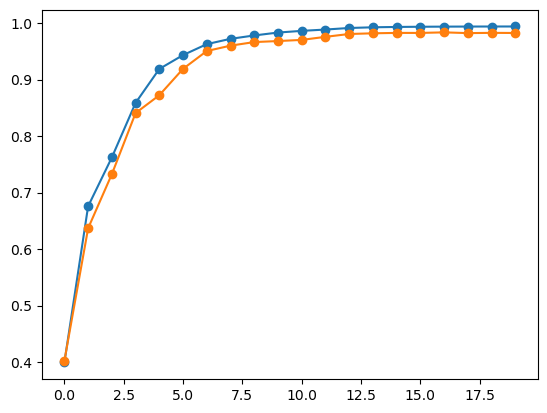

In [41]:
plt.plot(train_score, "-o")
plt.plot(test_score, "-o")
plt.show()

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)


python(3347) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3348) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3349) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3350) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3351) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3352) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3353) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3354) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3355) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(3356) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [44]:
mse_scores = -scores

print("Cross-Validation MSE Scores:", mse_scores)
print("Average Cross-Validation MSE Score:", mse_scores.mean())

Cross-Validation MSE Scores: [6.08209085e+09 9.00257806e+08 6.17287986e+09 1.22886026e+09
 1.00320253e+09]
Average Cross-Validation MSE Score: 3077458259.4098825
